<a href="https://colab.research.google.com/github/raghukarma/my_colab/blob/master/Cosine_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, RepeatVector
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## W2V

In [0]:
data = pd.read_excel("/content/ICD10-2020.xlsm",header=None,index_col=0,names=['idx','sno','out','input'])
data = data.loc[:,['out','input']].sample(n=1000, random_state=1)

In [0]:
data.head()

,out,input
64570,Sltr-haris Type I physl fx upper end of unsp f...,Salter-Harris Type I physeal fracture of upper...
34475,Pnctr w/o fb of unsp bk wl of thorax w penet t...,Puncture wound without foreign body of unspeci...
30249,"Open bite of left eyelid and periocular area, ...","Open bite of left eyelid and periocular area, ..."
89285,"Contact with electric knife, subsequent encounter","Contact with electric knife, subsequent encounter"
52297,Subluxation of MCP joint of right index finger...,Subluxation of metacarpophalangeal joint of ri...


In [0]:
from nltk.tokenize import RegexpTokenizer
def preprocess_text(text,MAX_LEN,pad_word = 'padword'):
  stop_words = set(stopwords.words('english')) 
  tokenizer = RegexpTokenizer(r'\w+')
  text = text.lower()
  text = text.split()
  text = [w for w in text if not w in stop_words]
  text = [word for word in text if word.isalpha()]
  if len(text) < MAX_LEN:
    diff = MAX_LEN - len(text)
    for i in range(diff):
      text.append(pad_word)    
    text = " ".join(text)
    w_t = tokenizer.tokenize(text)  
  else:
    text = " ".join(text[:MAX_LEN])
    w_t = tokenizer.tokenize(text)
  return w_t

In [0]:
d_o = []
d_i = []
for i,v in data.iterrows():
  d_o.append(preprocess_text(v['out'],20))
  d_i.append(preprocess_text(v['input'],20))


In [0]:
data.head()

,out,input
64570,Sltr-haris Type I physl fx upper end of unsp f...,Salter-Harris Type I physeal fracture of upper...
34475,Pnctr w/o fb of unsp bk wl of thorax w penet t...,Puncture wound without foreign body of unspeci...
30249,"Open bite of left eyelid and periocular area, ...","Open bite of left eyelid and periocular area, ..."
89285,"Contact with electric knife, subsequent encounter","Contact with electric knife, subsequent encounter"
52297,Subluxation of MCP joint of right index finger...,Subluxation of metacarpophalangeal joint of ri...


In [0]:
" ".join(d_o[0])

'type physl fx upper end unsp sequela padword padword padword padword padword padword padword padword padword padword padword padword padword'

In [0]:
total_data = d_o + d_i

In [0]:
path = get_tmpfile("word2vec.model")

cb = Word2Vec(sentences=total_data, size=100, window=2, min_count=1)

In [0]:
len(total_data)

2000

## Ignore


In [0]:
len(embedding_matrix)

2000

In [0]:
data.shape

(1000, 3)

In [0]:
data = data.reset_index()

In [0]:
embedding_matrix = np.zeros((len(data), 100))
embedding_matrix_ou = np.zeros((len(data), 100))
for i,v in data.iterrows():
  text = preprocess_text(v['input'],20)
  text_ou = preprocess_text(v['out'],20)
  for t in text:
    embedding_matrix[i] = cb.wv[t]
  for t_o in text_ou:
    embedding_matrix_ou[i] = cb.wv[t_o]

In [0]:
embedding_matrix = np.zeros((len(total_data), 100))
for i in total_data:
  for i,v in enumerate(total_data):
    for t in v:
      embedding_matrix[i] = cb.wv[t]

In [0]:
d_o[0]

In [0]:
w_t_idx = {}
for li in total_data:
  for i,v in enumerate(li):
    w_t_idx[v] = i

In [0]:
w_t_idx

In [0]:
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
embs_in_lis = []
embs_ou_lis = []

for i in tqdm(range(len(d_o))):
  for j in d_o:
    embeds_ou = nn.Embedding(len(j), 20)
    for c in j:
      output_tensor = torch.tensor(w_t_idx[c], dtype=torch.long)
      ou_embed = embeds_ou(output_tensor)
      embs_ou_lis.append(ou_embed)
  for k in d_i:
    embeds_in = nn.Embedding(len(k), 20)
    for ch in k:
      input_tensor = torch.tensor(w_t_idx[ch], dtype=torch.long)
      in_embed = embeds_in(input_tensor)
      embs_in_lis.append(in_embed)
    

In [0]:
for i in range(len(d_o[:10])):
  for j in d_o:
    print(j)
    for c in j:
      print(len(j))
      embeds = nn.Embedding(len(j), 20)
      lookup_tensor = torch.tensor(cb.wv[c], dtype=torch.long)
      print(lookup_tensor)
      hello_embed = embeds(lookup_tensor)
      embs_ou_lis.append(hello_embed)

In [0]:
sim = []
for i in tqdm(range(len(input_ids))):
  sim.append(cosine_similarity([list(input_ids[i])],[list(output_ids[i])]))

In [0]:
cb.wv["typhoid"]

## AE


In [0]:
data = pd.read_excel("/content/ICD10-2020.xlsm",header=None,index_col=0,names=['idx','sno','out','input'])
data = data.loc[:,['out','input']].sample(n=1000, random_state=1)

In [0]:
data.head()

,out,input
64570,Sltr-haris Type I physl fx upper end of unsp f...,Salter-Harris Type I physeal fracture of upper...
34475,Pnctr w/o fb of unsp bk wl of thorax w penet t...,Puncture wound without foreign body of unspeci...
30249,"Open bite of left eyelid and periocular area, ...","Open bite of left eyelid and periocular area, ..."
89285,"Contact with electric knife, subsequent encounter","Contact with electric knife, subsequent encounter"
52297,Subluxation of MCP joint of right index finger...,Subluxation of metacarpophalangeal joint of ri...


In [0]:
from nltk.tokenize import RegexpTokenizer
def preprocess_text(text):
  tokenizer = RegexpTokenizer(r'\w+')
  text = text.lower()
  text = text.split()
  text = " ".join(text)
  w_t = tokenizer.tokenize(text)
  return " ".join(w_t)

In [0]:
from nltk.tokenize import RegexpTokenizer
def preprocess_text_wv(text,MAX_LEN,pad_word = 'padword'):
  stop_words = set(stopwords.words('english')) 
  tokenizer = RegexpTokenizer(r'\w+')
  text = text.lower()
  text = text.split()
  text = [w for w in text if not w in stop_words]
  text = [word for word in text if word.isalpha()]
  if len(text) < MAX_LEN:
    diff = MAX_LEN - len(text)
    for i in range(diff):
      text.append(pad_word)    
    text = " ".join(text)
    w_t = tokenizer.tokenize(text)  
  else:
    text = " ".join(text[:MAX_LEN])
    w_t = tokenizer.tokenize(text)
  return w_t

In [0]:
d_o_w = []
d_i_w = []
for i,v in data.iterrows():
  d_o_w.append(preprocess_text_wv(v['out'],20))
  d_i_w.append(preprocess_text_wv(v['input'],20))


In [0]:
total_data_wv = d_o_w + d_i_w

In [0]:
path = get_tmpfile("word2vec.model")

cb = Word2Vec(sentences=total_data_wv, size=100, window=2, min_count=1)

In [0]:
wv = []
wv_r = []
for i in total_data_wv[:5]:
  wv_r = []
  for w in i:
    wv_r.append(cb.wv[w])
  wv.append(wv_r)
  

In [0]:
np.array(wv[0]).shape

(20, 100)

In [0]:
maxlen = 20
encoder_inputs = Input(shape=(maxlen,), name='Encoder-Input')
x = wv
state_h = Bidirectional(LSTM(10, activation='relu', name='Encoder-Last-LSTM'))(x)
encoder_model = Model(inputs=encoder_inputs, outputs=state_h, name='Encoder-Model')
seq2seq_encoder_out = encoder_model(encoder_inputs)

decoded = RepeatVector(maxlen)(seq2seq_encoder_out)
decoder_lstm = Bidirectional(LSTM(10, return_sequences=True, name='Decoder-LSTM-before'))
decoder_lstm_output = decoder_lstm(decoded)
decoder_dense = Dense(num_words, activation='softmax', name='Final-Output-Dense-before')
decoder_outputs = decoder_dense(decoder_lstm_output)


In [0]:
vecs = encoder_model.predict(wv)

In [0]:
vecs[0]

array([0.00097221, 0.        , 0.01111911, 0.00551455, 0.00899382,
       0.        , 0.00144677, 0.00104177, 0.00907119, 0.00258824,
       0.00754483, 0.01400521, 0.        , 0.        , 0.        ,
       0.        , 0.00751842, 0.        , 0.        , 0.00371232],
      dtype=float32)

In [0]:
d_i_wv = []
di_w_r = []
for i in d_i_w:
  di_w_r = []
  for w in i:
    di_w_r.append(cb.wv[w])
  d_i_wv.append(di_w_r)

In [0]:
d_i_wv[0][0].shape

(100,)

In [0]:
d_i_w[1]

['puncture',
 'wound',
 'without',
 'foreign',
 'body',
 'unspecified',
 'back',
 'wall',
 'thorax',
 'penetration',
 'thoracic',
 'sequela',
 'padword',
 'padword',
 'padword',
 'padword',
 'padword',
 'padword',
 'padword',
 'padword']

In [0]:
d_o_w[1]

In [0]:
maxlen = 20
encoder_inputs = Input(shape=(maxlen,), name='Encoder-Input')
x = d_i_wv
state_h = Bidirectional(LSTM(20, activation='relu', name='Encoder-Last-LSTM'))(x)
encoder_model = Model(inputs=encoder_inputs, outputs=state_h, name='Encoder-Model')
seq2seq_encoder_out = encoder_model(encoder_inputs)

# decoded = RepeatVector(maxlen)(seq2seq_encoder_out)
# decoder_lstm = Bidirectional(LSTM(10, return_sequences=True, name='Decoder-LSTM-before'))
# decoder_lstm_output = decoder_lstm(decoded)
# decoder_dense = Dense(num_words, activation='softmax', name='Final-Output-Dense-before')
# decoder_outputs = decoder_dense(decoder_lstm_output)


In [0]:
encoder_model.summary()

Model: "Encoder-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder-Input (InputLayer)   [(None, 20)]              0         
_________________________________________________________________
Body-Word-Embedding (Embeddi (None, 20, 100)           200000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 20)                8880      
Total params: 208,880
Trainable params: 208,880
Non-trainable params: 0
_________________________________________________________________


In [0]:
diw_vecs = encoder_model.predict(d_i_wv)

In [0]:
diw_vecs[0]

array([0.00097221, 0.        , 0.01111911, 0.00551455, 0.00899382,
       0.        , 0.00144677, 0.00104177, 0.00907119, 0.00258824,
       0.00754483, 0.01400521, 0.        , 0.        , 0.        ,
       0.        , 0.00751842, 0.        , 0.        , 0.00371232],
      dtype=float32)

In [0]:
d_o_wv = []
do_w_r = []
for i in d_o_w:
  do_w_r = []
  for w in i:
    do_w_r.append(cb.wv[w])
  d_o_wv.append(do_w_r)

In [0]:
maxlen = 20
encoder_inputs = Input(shape=(maxlen,), name='Encoder-Input')
x = d_o_wv
state_h = Bidirectional(LSTM(10, activation='relu', name='Encoder-Last-LSTM'))(x)
encoder_model = Model(inputs=encoder_inputs, outputs=state_h, name='Encoder-Model')
seq2seq_encoder_out = encoder_model(encoder_inputs)

decoded = RepeatVector(maxlen)(seq2seq_encoder_out)
decoder_lstm = Bidirectional(LSTM(10, return_sequences=True, name='Decoder-LSTM-before'))
decoder_lstm_output = decoder_lstm(decoded)
decoder_dense = Dense(num_words, activation='softmax', name='Final-Output-Dense-before')
decoder_outputs = decoder_dense(decoder_lstm_output)


In [0]:
dow_vecs = encoder_model.predict(d_o_wv)

In [0]:
from tqdm.notebook import tqdm
from sklearn.metrics.pairwise import cosine_similarity
sim = []
for i in tqdm(range(len(diw_vecs))):
  sim.append(cosine_similarity([list(diw_vecs[i])],[list(dow_vecs[i])]))

In [0]:
data_1 = pd.DataFrame(list(zip(diw_vecs,dow_vecs,sim)), columns=['input','output','similarity'])

In [0]:
data_1.head()

,input,output,similarity
0,"[0.0009722061, 0.0, 0.011119109, 0.005514547, ...","[0.0009722061, 0.0, 0.011119109, 0.005514547, ...",[[1.0]]
1,"[0.0009722061, 0.0, 0.011119109, 0.005514547, ...","[0.0009722061, 0.0, 0.011119109, 0.005514547, ...",[[1.0]]
2,"[0.0009722061, 0.0, 0.011119109, 0.005514547, ...","[0.0009722061, 0.0, 0.011119109, 0.005514547, ...",[[1.0]]
3,"[0.0009722061, 0.0, 0.011119109, 0.005514547, ...","[0.0009722061, 0.0, 0.011119109, 0.005514547, ...",[[1.0]]
4,"[0.0009722061, 0.0, 0.011119109, 0.005514547, ...","[0.0009722061, 0.0, 0.011119109, 0.005514547, ...",[[1.0]]


In [0]:
data_1.to_csv('WV_cosine_tokens.csv')

In [0]:
data_2 = pd.DataFrame(list(zip(data['input'].tolist(),data['out'].tolist(),sim)),columns=['input','output','similarity'])

In [0]:
data_2.to_csv('WV_cosine_text.csv')

In [0]:
import itertools
merged_i = list(itertools.chain(*diw_vecs))
merged_o = list(itertools.chain(*dow_vecs))

In [0]:
cosine_similarity([merged_i],[merged_o])

array([[0.99999946]], dtype=float32)

### AE Tokens

In [0]:
d_o = []
d_i = []
for i,v in data.iterrows():
  d_o.append(preprocess_text(v['out']))
  d_i.append(preprocess_text(v['input']))


In [0]:
total_data = d_o + d_i

In [0]:
data.head()

,out,input
64570,Sltr-haris Type I physl fx upper end of unsp f...,Salter-Harris Type I physeal fracture of upper...
34475,Pnctr w/o fb of unsp bk wl of thorax w penet t...,Puncture wound without foreign body of unspeci...
30249,"Open bite of left eyelid and periocular area, ...","Open bite of left eyelid and periocular area, ..."
89285,"Contact with electric knife, subsequent encounter","Contact with electric knife, subsequent encounter"
52297,Subluxation of MCP joint of right index finger...,Subluxation of metacarpophalangeal joint of ri...


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
maxlen = 20
embed_dim = 100
num_words = len(total_data)
sentences = total_data
tokenizer = Tokenizer(num_words = num_words, split=' ')
tokenizer.fit_on_texts(sentences)
seqs = tokenizer.texts_to_sequences(sentences)
pad_seqs = pad_sequences(seqs, maxlen,padding='post',truncating='post')

In [0]:
seqs[0]
pad_seqs[0]

[155, 156, 23, 69, 179, 13, 40, 27, 1, 14, 165, 12]

In [0]:
encoder_inputs = Input(shape=(maxlen,), name='Encoder-Input')
emb_layer = Embedding(num_words, embed_dim,input_length = maxlen, name='Body-Word-Embedding', mask_zero=False)
x = emb_layer(encoder_inputs)
state_h = Bidirectional(LSTM(10, activation='relu', name='Encoder-Last-LSTM'))(x)
encoder_model = Model(inputs=encoder_inputs, outputs=state_h, name='Encoder-Model')
seq2seq_encoder_out = encoder_model(encoder_inputs)

decoded = RepeatVector(maxlen)(seq2seq_encoder_out)
decoder_lstm = Bidirectional(LSTM(10, return_sequences=True, name='Decoder-LSTM-before'))
decoder_lstm_output = decoder_lstm(decoded)
decoder_dense = Dense(num_words, activation='softmax', name='Final-Output-Dense-before')
decoder_outputs = decoder_dense(decoder_lstm_output)


In [0]:
vecs = encoder_model.predict(pad_seqs)

In [0]:
vecs[1]

array([0.00274622, 0.0062083 , 0.0267744 , 0.02734233, 0.02562678,
       0.01053141, 0.006746  , 0.00162819, 0.0323598 , 0.00491927,
       0.02339721, 0.00709164, 0.02250202, 0.05504746, 0.0016601 ,
       0.02132615, 0.01952218, 0.01310861, 0.01012161, 0.0111191 ],
      dtype=float32)

In [0]:
from tensorflow.keras import optimizers
seq2seq_Model = Model(encoder_inputs, decoder_outputs)
seq2seq_Model.compile(optimizer=optimizers.Nadam(lr=0.001), loss='sparse_categorical_crossentropy')
history = seq2seq_Model.fit(pad_seqs, np.expand_dims(pad_seqs, -1),
          batch_size=batch_size,
          epochs=10)

NameError: ignored

## BERT With Stopwords


In [0]:
pip install sentencepiece

In [0]:
pip install bert-for-tf2

In [0]:
!pip install pytorch-pretrained-bert pytorch-nlp

In [0]:
from bert import bert_tokenization

from tensorflow.keras.layers import Embedding
from pytorch_pretrained_bert import BertTokenizer
from tqdm.notebook import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
from nltk.tokenize import RegexpTokenizer
def preprocess_text(text):
  stop_words = set(stopwords.words('english')) 
  tokenizer = RegexpTokenizer(r'\w+')
  text = text.lower()
  text = text.split()
  text = " ".join(text)
  w_t = tokenizer.tokenize(text)
  pre_text = [] 
  for w in w_t: 
    if w not in stop_words:
      pre_text.append(w)
  return " ".join(pre_text)

In [0]:
data = pd.read_excel("/content/ICD10-2020.xlsm",header=None,index_col=0,names=['idx','sno','out','input'])

In [0]:
data['input'] = data['input'].apply(preprocess_text)
data['out'] = data['out'].apply(preprocess_text)

In [0]:
data.head()

,idx,sno,out,input
1,A00,0,cholera,cholera
2,A000,1,cholera due vibrio cholerae 01 biovar cholerae,cholera due vibrio cholerae 01 biovar cholerae
3,A001,1,cholera due vibrio cholerae 01 biovar eltor,cholera due vibrio cholerae 01 biovar eltor
4,A009,1,cholera unspecified,cholera unspecified
5,A01,0,typhoid paratyphoid fevers,typhoid paratyphoid fevers


In [0]:

def gen_id_mask(values):
  # We need to add special tokens at the beginning and end of each sentence for BERT to work properly
  inputs_s = ["[CLS] " + inputs + " [SEP]" for inputs in values]

  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

  tokenized_texts_in = [tokenizer.tokenize(inputs) for inputs in inputs_s]
  MAX_LEN = 20
  input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts_in]
  input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

  return (input_ids)

In [0]:
dfs = np.array_split(data,97)

In [0]:
input_ids = []
output_ids = []
for df in tqdm(dfs,total=len(dfs)):
  input_ids.append(gen_id_mask(df['input'].values))
  output_ids.append(gen_id_mask(df['out'].values))

In [0]:
import itertools
input_ids = list(itertools.chain(*input_ids))
output_ids = list(itertools.chain(*output_ids))

In [0]:
sim = []
for i in tqdm(range(len(input_ids))):
  sim.append(cosine_similarity([list(input_ids[i])],[list(output_ids[i])]))

In [0]:
data_1 = pd.DataFrame(list(zip(input_ids,output_ids,sim)), columns=['input','output','similarity'])

In [0]:
data_1.shape

(94765, 3)

In [0]:
data_1.head()

,input,output,similarity
0,"[101, 25916, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[101, 25916, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",[[1.0]]
1,"[101, 25916, 2349, 6819, 23736, 2080, 25916, 2...","[101, 25916, 2349, 6819, 23736, 2080, 25916, 2...",[[0.9999999999999999]]
2,"[101, 25916, 2349, 6819, 23736, 2080, 25916, 2...","[101, 25916, 2349, 6819, 23736, 2080, 25916, 2...",[[0.9999999999999998]]
3,"[101, 25916, 25851, 102, 0, 0, 0, 0, 0, 0, 0, ...","[101, 25916, 25851, 102, 0, 0, 0, 0, 0, 0, 0, ...",[[1.0]]
4,"[101, 5939, 8458, 9314, 11498, 3723, 8458, 931...","[101, 5939, 8458, 9314, 11498, 3723, 8458, 931...",[[1.0]]


In [0]:
data_1.to_csv('bert_cosine_tokens.csv')

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
data_2 = pd.DataFrame(list(zip(data['input'].tolist(),data['out'].tolist(),sim)),columns=['input','output','similarity'])

In [0]:
data_2.to_csv('bert_cosine_text.csv')

In [0]:
import itertools
merged_i = list(itertools.chain(*input_ids))
merged_o = list(itertools.chain(*output_ids))

In [0]:
cosine_similarity([merged_i],[merged_o])

array([[0.76209092]])

In [0]:
cosine_similarity([[1]],[[1]])

array([[1.]])

## BERT With out Stopwords


In [0]:
from nltk.tokenize import RegexpTokenizer
def preprocess_text(text):
  stop_words = set(stopwords.words('english')) 
  tokenizer = RegexpTokenizer(r'\w+')
  text = text.lower()
  text = text.split()
  text = " ".join(text)
  w_t = tokenizer.tokenize(text)
  pre_text = [] 
  for w in w_t:
    pre_text.append(w)
  return " ".join(pre_text)

In [0]:
a = "Hai Hello type1 23 2ya ! ook sdf , sdf a the o) ? "

In [0]:
preprocess_text(a)

'hai hello type1 23 2ya ook sdf sdf a the o'

In [0]:
data = pd.read_excel("/content/ICD10-2020.xlsm",header=None,index_col=0,names=['idx','sno','out','input'])

In [0]:
data['input'] = data['input'].apply(preprocess_text)
data['out'] = data['out'].apply(preprocess_text)

In [0]:
data.head()

,idx,sno,out,input
1,A00,0,cholera,cholera
2,A000,1,cholera due to vibrio cholerae 01 biovar cholerae,cholera due to vibrio cholerae 01 biovar cholerae
3,A001,1,cholera due to vibrio cholerae 01 biovar eltor,cholera due to vibrio cholerae 01 biovar eltor
4,A009,1,cholera unspecified,cholera unspecified
5,A01,0,typhoid and paratyphoid fevers,typhoid and paratyphoid fevers


In [0]:

def gen_id_mask(values):
  # We need to add special tokens at the beginning and end of each sentence for BERT to work properly
  inputs_s = ["[CLS] " + inputs + " [SEP]" for inputs in values]

  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

  tokenized_texts_in = [tokenizer.tokenize(inputs) for inputs in inputs_s]
  MAX_LEN = 20
  input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts_in]
  input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

  return (input_ids)

In [0]:
dfs = np.array_split(data,97)

In [0]:
input_ids = []
output_ids = []
for df in tqdm(dfs,total=len(dfs)):
  input_ids.append(gen_id_mask(df['input'].values))
  output_ids.append(gen_id_mask(df['out'].values))

In [0]:
import itertools
input_ids = list(itertools.chain(*input_ids))
output_ids = list(itertools.chain(*output_ids))

In [0]:
sim = []
for i in tqdm(range(len(input_ids))):
  sim.append(cosine_similarity([list(input_ids[i])],[list(output_ids[i])]))

In [0]:
data_3 = pd.DataFrame(list(zip(input_ids,output_ids,sim)), columns=['input','output','similarity'])

In [0]:
data_3.head()

,input,output,similarity
0,"[101, 25916, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[101, 25916, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",[[1.0]]
1,"[101, 25916, 2349, 2000, 6819, 23736, 2080, 25...","[101, 25916, 2349, 2000, 6819, 23736, 2080, 25...",[[1.0]]
2,"[101, 25916, 2349, 2000, 6819, 23736, 2080, 25...","[101, 25916, 2349, 2000, 6819, 23736, 2080, 25...",[[0.9999999999999998]]
3,"[101, 25916, 25851, 102, 0, 0, 0, 0, 0, 0, 0, ...","[101, 25916, 25851, 102, 0, 0, 0, 0, 0, 0, 0, ...",[[1.0]]
4,"[101, 5939, 8458, 9314, 1998, 11498, 3723, 845...","[101, 5939, 8458, 9314, 1998, 11498, 3723, 845...",[[1.0000000000000002]]


In [0]:
data_3.to_csv('bert_cosine_ws_tokens.csv')

In [0]:
data_4 = pd.DataFrame(list(zip(data['input'].tolist(),data['out'].tolist(),sim)),columns=['input','output','similarity'])

In [0]:
data_4.to_csv('bert_cosine_ws_text.csv')

In [0]:
import itertools
merged_i = list(itertools.chain(*input_ids))
merged_o = list(itertools.chain(*output_ids))

In [0]:
cosine_similarity([merged_i],[merged_o])

array([[0.74995165]])

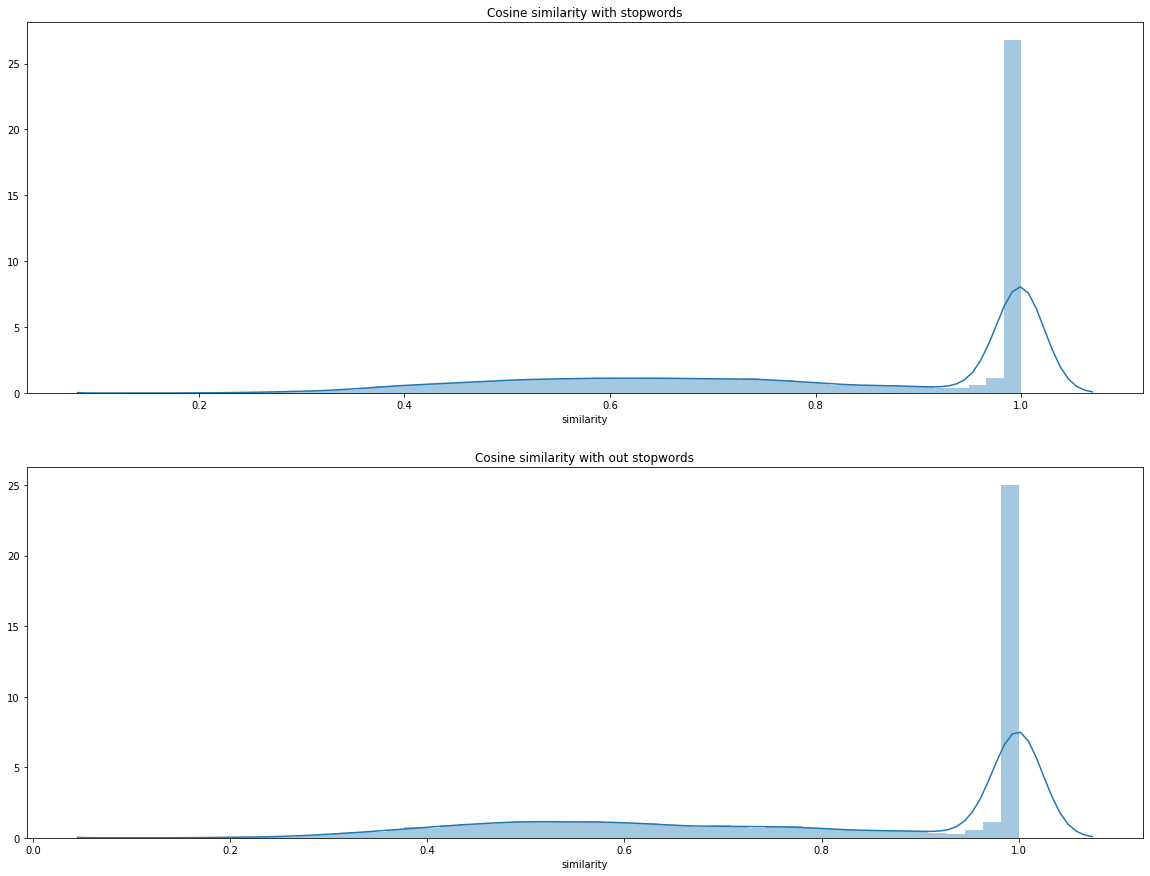

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(20,15))
ax1.set_title('Cosine similarity with stopwords')
ax2.set_title('Cosine similarity with out stopwords')
sns.distplot(data_1['similarity'],ax=ax1)
sns.distplot(data_4['similarity'],ax=ax2);

In [0]:
fig.savefig('cosine_sim.png')

## Keras AE

In [0]:
data = pd.read_excel("/content/ICD10-2020.xlsm",header=None,index_col=0,names=['idx','sno','out','input'])
#data = data.loc[:,['out','input']].sample(n=1000, random_state=1)

In [0]:
from nltk.tokenize import RegexpTokenizer
def preprocess_text(text,MAX_LEN,pad_word = 'padword'):
  stop_words = set(stopwords.words('english')) 
  tokenizer = RegexpTokenizer(r'\w+')
  text = text.lower()
  text = text.split()
  text = [w for w in text if not w in stop_words]
  text = [word for word in text if word.isalpha()]
  if len(text) < MAX_LEN:
    diff = MAX_LEN - len(text)
    for i in range(diff):
      text.append(pad_word)    
    text = " ".join(text)
    w_t = tokenizer.tokenize(text)  
  else:
    text = " ".join(text[:MAX_LEN])
    w_t = tokenizer.tokenize(text)
  return w_t

In [0]:
d_o = []
d_i = []
for i,v in data.iterrows():
  d_o.append(preprocess_text(v['out'],20))
  d_i.append(preprocess_text(v['input'],20))


In [0]:
total_data = d_o + d_i

In [0]:
path = get_tmpfile("word2vec.model")

cb = Word2Vec(sentences=total_data, size=100, window=2, min_count=1)

In [0]:
d_i_wv = []
di_w_r = []
for i in d_i:
  di_w_r = []
  for w in i:
    di_w_r.append(cb.wv[w])
  d_i_wv.append(di_w_r)

In [0]:
d_o_wv = []
do_w_r = []
for i in d_o:
  do_w_r = []
  for w in i:
    do_w_r.append(cb.wv[w])
  d_o_wv.append(do_w_r)

In [0]:
d_i_wv_ = np.array(d_i_wv)

In [0]:
d_i_wv_[0].shape

(20, 100)

In [0]:
d_i_wv_[0].shape

(20, 100)

In [0]:
import itertools
di_m = []
do_m = []
for i in range(len(d_i_wv)):
  di_m.append(list(itertools.chain(*d_i_wv[i])))
  do_m.append(list(itertools.chain(*d_o_wv[i])))


In [0]:
di_m = np.array(di_m)
do_m = np.array(do_m)

In [0]:
from tensorflow.keras.models import Model


encoding_dim = 20 
input_img = Input(shape=(2000,))
layer_1 = Dense(1000, activation='relu')(input_img)
layer_2 = Dense(100, activation='relu')(layer_1)
encoded = Dense(encoding_dim, activation='relu')(layer_2)

decoded = Dense(2000, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = Dense(encoding_dim, activation='relu')(encoded_input)
decoder_layer = Dense(100, activation='relu')(decoder_layer)
decoder_layer = Dense(1000, activation='relu')(decoder_layer)
decoder_layer = Dense(2000, activation='sigmoid')(decoder_layer)

decoder = Model(encoded_input, decoder_layer)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
di_m.shape

(94765, 2000)

In [0]:
autoencoder.fit(di_m[:94000], di_m[:94000],
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(di_m[765:], di_m[765:]))

Epoch 1/20
368/368 [==============================] - 4s 12ms/step - loss: 0.6956 - val_loss: 0.6950
Epoch 2/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6944 - val_loss: 0.6939
Epoch 3/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6934 - val_loss: 0.6930
Epoch 4/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6925 - val_loss: 0.6921
Epoch 5/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6916 - val_loss: 0.6912
Epoch 6/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6907 - val_loss: 0.6903
Epoch 7/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6897 - val_loss: 0.6892
Epoch 8/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6886 - val_loss: 0.6880
Epoch 9/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6873 - val_loss: 0.6865
Epoch 10/20
368/368 [==============================] - 4s 11ms/step - loss: 0.6857 - val_lo

In [0]:
i_t = encoder.predict(di_m)
o_t = encoder.predict(do_m)


d_i_t = decoder.predict(i_t)
d_o_t = decoder.predict(o_t)

In [0]:
len(d_i_t[0])

2000

In [0]:
from tqdm.notebook import tqdm
from sklearn.metrics.pairwise import cosine_similarity
sim = []
for i in tqdm(range(len(d_i_t))):
  sim.append(cosine_similarity([list(d_i_t[i])],[list(d_o_t[i])]))

In [0]:
data_1 = pd.DataFrame(list(zip(d_i_t,d_o_t,sim)), columns=['input','output','similarity'])

In [0]:
data_1.head()

,input,output,similarity
0,"[0.48623592, 0.4483583, 0.4683769, 0.4859993, ...","[0.48623592, 0.4483583, 0.4683769, 0.4859993, ...",[[1.0000001]]
1,"[0.49750897, 0.45751736, 0.47589883, 0.4868732...","[0.49750897, 0.45751736, 0.47589883, 0.4868732...",[[1.0000002]]
2,"[0.49744546, 0.45718142, 0.47574943, 0.4868791...","[0.49744546, 0.45718142, 0.47574943, 0.4868791...",[[1.0]]
3,"[0.4864555, 0.44969642, 0.46641353, 0.48463234...","[0.4864555, 0.44969642, 0.46641353, 0.48463234...",[[1.0000004]]
4,"[0.48835507, 0.45105514, 0.4691653, 0.4856893,...","[0.48835507, 0.45105514, 0.4691653, 0.4856893,...",[[0.99999994]]


In [0]:
data_1.to_csv('decoder_WVk_cosine_tokens.csv')

In [0]:
data_2 = pd.DataFrame(list(zip(data['input'].tolist(),data['out'].tolist(),sim)),columns=['input','output','similarity'])

In [0]:
data_2.to_csv('decoder_WVk_cosine_text.csv')

In [0]:
import itertools
merged_i = list(itertools.chain(*d_i_t))
merged_o = list(itertools.chain(*d_o_t))

In [0]:
cosine_similarity([merged_i],[merged_o])

array([[0.9998295]], dtype=float32)

In [0]:
import itertools
merged_i = list(itertools.chain(*i_t))
merged_o = list(itertools.chain(*o_t))

In [0]:
cosine_similarity([merged_i],[merged_o])

array([[0.9930305]], dtype=float32)

In [0]:
import tensorflow
encoder.save('/content/drive/My Drive/RoundSqr/Finitive/Autoencoder/ae_encoder.h5')
decoder.save('/content/drive/My Drive/RoundSqr/Finitive/Autoencoder/ae_decoder.h5')

## Encoder

In [0]:
data = pd.read_excel("/content/ICD10-2020.xlsm",header=None,index_col=0,names=['idx','sno','out','input'])
#data = data.loc[:,['out','input']].sample(n=1000, random_state=1)

In [0]:
from nltk.tokenize import RegexpTokenizer
def preprocess_text(text,MAX_LEN,pad_word = 'padword'):
  stop_words = set(stopwords.words('english')) 
  tokenizer = RegexpTokenizer(r'\w+')
  text = text.lower()
  text = text.split()
  text = [w for w in text if not w in stop_words]
  text = [word for word in text if word.isalpha()]
  if len(text) < MAX_LEN:
    diff = MAX_LEN - len(text)
    for i in range(diff):
      text.append(pad_word)    
    text = " ".join(text)
    w_t = tokenizer.tokenize(text)  
  else:
    text = " ".join(text[:MAX_LEN])
    w_t = tokenizer.tokenize(text)
  return w_t

In [0]:
d_o = []
d_i = []
for i,v in data.iterrows():
  d_o.append(preprocess_text(v['out'],20))
  d_i.append(preprocess_text(v['input'],20))


In [0]:
total_data = d_o + d_i

In [0]:
path = get_tmpfile("word2vec.model")

cb = Word2Vec(sentences=total_data, size=100, window=2, min_count=1)

In [0]:
d_i_wv = []
di_w_r = []
for i in d_i:
  di_w_r = []
  for w in i:
    di_w_r.append(cb.wv[w])
  d_i_wv.append(di_w_r)

In [0]:
d_o_wv = []
do_w_r = []
for i in d_o:
  do_w_r = []
  for w in i:
    do_w_r.append(cb.wv[w])
  d_o_wv.append(do_w_r)

In [0]:
d_i_wv_ = np.array(d_i_wv)

In [0]:
d_i_wv_[0].shape

(20, 100)

In [0]:
d_i_wv_[0].shape

(20, 100)

In [0]:
import itertools
di_m = []
do_m = []
for i in range(len(d_i_wv)):
  di_m.append(list(itertools.chain(*d_i_wv[i])))
  do_m.append(list(itertools.chain(*d_o_wv[i])))


In [0]:
di_m = np.array(di_m)
do_m = np.array(do_m)

In [0]:
from tensorflow.keras.models import Model


encoding_dim = 20 
input_img = Input(shape=(2000,))
layer_1 = Dense(1000, activation='relu')(input_img)
layer_2 = Dense(100, activation='relu')(layer_1)
encoded = Dense(encoding_dim, activation='relu')(layer_2)
encoder = Model(input_img, encoded)

In [0]:
di_m.shape

(94765, 2000)

In [0]:
i_t = encoder.predict(di_m)
o_t = encoder.predict(do_m)

In [0]:
from tqdm.notebook import tqdm
from sklearn.metrics.pairwise import cosine_similarity
sim = []
for i in tqdm(range(len(i_t))):
  sim.append(cosine_similarity([list(i_t[i])],[list(o_t[i])]))

In [0]:
data_1 = pd.DataFrame(list(zip(i_t,o_t,sim)), columns=['input','output','similarity'])

In [0]:
data_1.head()

,input,output,similarity
0,"[0.0, 0.28807968, 0.28498617, 0.0, 0.0, 0.0339...","[0.0, 0.28807968, 0.28498617, 0.0, 0.0, 0.0339...",[[1.0]]
1,"[0.23148018, 0.0, 0.430037, 0.0, 0.13593486, 0...","[0.23148018, 0.0, 0.430037, 0.0, 0.13593486, 0...",[[0.99999994]]
2,"[0.23398277, 0.0, 0.4355881, 0.0, 0.121749945,...","[0.23398277, 0.0, 0.4355881, 0.0, 0.121749945,...",[[0.99999994]]
3,"[0.0114015, 0.2763524, 0.4285378, 0.0, 0.0, 0....","[0.0114015, 0.2763524, 0.4285378, 0.0, 0.0, 0....",[[0.99999994]]
4,"[0.19293119, 0.18792884, 0.29310545, 0.1329415...","[0.19293119, 0.18792884, 0.29310545, 0.1329415...",[[0.9999999]]


In [0]:
data_1.to_csv('WVk_cosine_tokens.csv')

In [0]:
data_2 = pd.DataFrame(list(zip(data['input'].tolist(),data['out'].tolist(),sim)),columns=['input','output','similarity'])

In [0]:
data_2.to_csv('WVk_cosine_text.csv')

In [0]:
import itertools
merged_i = list(itertools.chain(*i_t))
merged_o = list(itertools.chain(*o_t))

In [0]:
cosine_similarity([merged_i],[merged_o])

array([[0.7957728]], dtype=float32)

In [0]:
import tensorflow
autoencoder.save('/content/drive/My Drive/RoundSqr/Finitive/Autoencoder/encoder_only.h5')
rae = tensorflow.keras.models.load_model('/content/drive/My Drive/RoundSqr/Finitive/Autoencoder/encoder_only.h5')